In [12]:
import os
from PIL import Image
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import cv2

In [13]:
root = "valid"

fname = os.listdir(root)

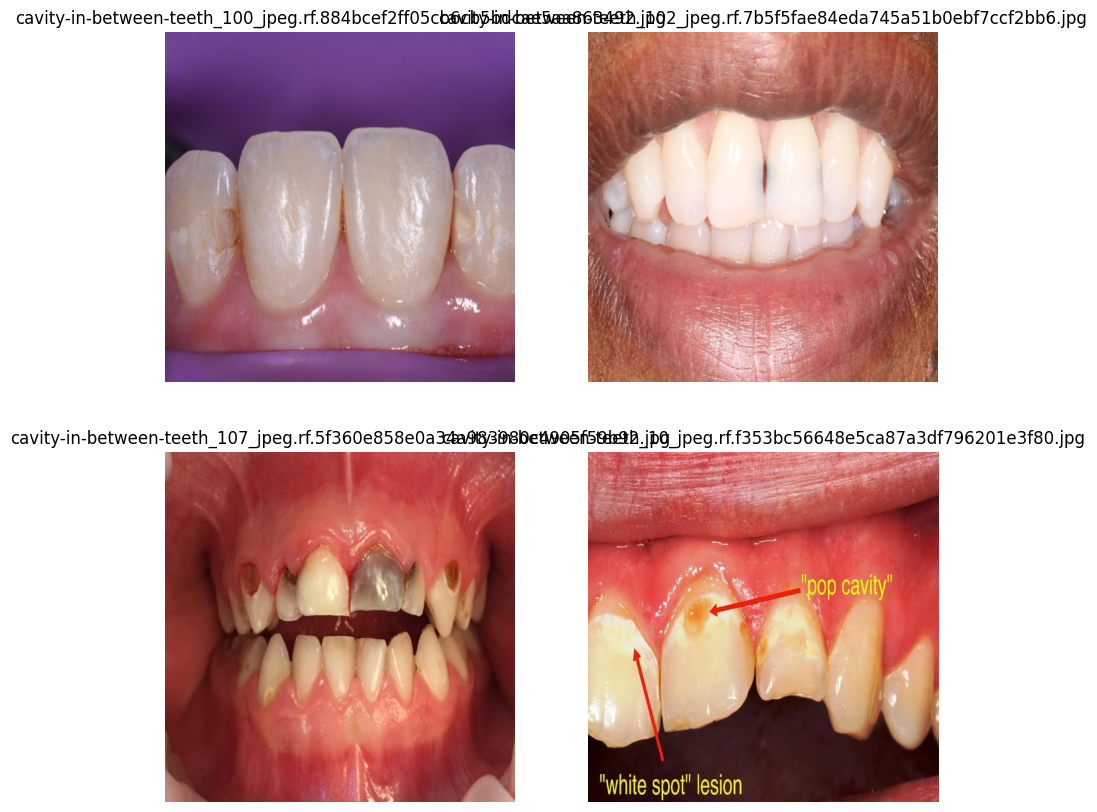

In [14]:
disease_name = []
image_data = []
fig , axs = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
axs = axs.flatten()
# for i in range(4):
#         filepath = os.path.join(root,fname[i])
#         img = Image.open(filepath)
#         image_array = np.array(img)
#         image_data.append(img)
#         axs [i].imshow(img)
#         axs[i].axis("off")
#         axs[i].set_title(fname[i])
#         disease_name.append(fname[i])
# #     img = cv2.imread(os.path.join(root,fname[i]), cv2.COLOR_BGR2RGB)
# #     img = cv2.imshow(img)
# #     print(img)
# #     flattened_array = image_array.flatten()
# #     data["image_data"].append(flattened_array)    
# #     disease_name.append(fname[i])
# # np.savetxt("frature.csv",img,delimiter = ",")

for i in range(4):
    filepath = os.path.join(root, fname[i])
    img = Image.open(filepath)
    image_array = np.array(img)
    image_data.append(filepath)  # Store the file path instead of the PIL.Image object
    axs[i].imshow(img)
    axs[i].axis("off")
    axs[i].set_title(fname[i])
    disease_name.append(fname[i])

In [15]:
data = {
    "disease" : disease_name,
    "image_data" : image_data
}


In [16]:
df = pd.DataFrame(data)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   disease     4 non-null      object
 1   image_data  4 non-null      object
dtypes: object(2)
memory usage: 196.0+ bytes


,disease,image_data
0,cavity-in-between-teeth_100_jpeg.rf.884bcef2ff...,valid\cavity-in-between-teeth_100_jpeg.rf.884b...
1,cavity-in-between-teeth_102_jpeg.rf.7b5f5fae84...,valid\cavity-in-between-teeth_102_jpeg.rf.7b5f...
2,cavity-in-between-teeth_107_jpeg.rf.5f360e858e...,valid\cavity-in-between-teeth_107_jpeg.rf.5f36...
3,cavity-in-between-teeth_10_jpeg.rf.f353bc56648...,valid\cavity-in-between-teeth_10_jpeg.rf.f353b...


In [17]:
df.to_csv("image_data.csv",index=False)

In [18]:
df = pd.read_csv("image_data.csv")
print(df.head())
df.info()

                                             disease  \
0  cavity-in-between-teeth_100_jpeg.rf.884bcef2ff...   
1  cavity-in-between-teeth_102_jpeg.rf.7b5f5fae84...   
2  cavity-in-between-teeth_107_jpeg.rf.5f360e858e...   
3  cavity-in-between-teeth_10_jpeg.rf.f353bc56648...   

                                          image_data  
0  valid\cavity-in-between-teeth_100_jpeg.rf.884b...  
1  valid\cavity-in-between-teeth_102_jpeg.rf.7b5f...  
2  valid\cavity-in-between-teeth_107_jpeg.rf.5f36...  
3  valid\cavity-in-between-teeth_10_jpeg.rf.f353b...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   disease     4 non-null      object
 1   image_data  4 non-null      object
dtypes: object(2)
memory usage: 196.0+ bytes


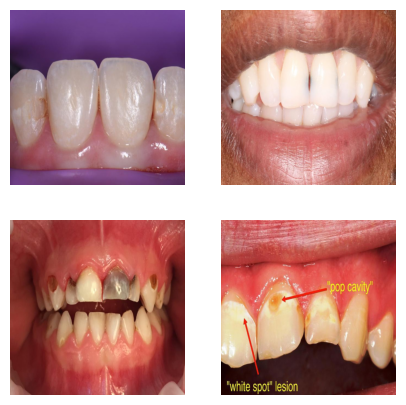

In [19]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(5,5))
axs = axs.flatten()
for i in range(4):    
    image = cv2.imread(df.image_data[i])  # Assuming df.image_data[i] is a file path
    if image is not None:  # Check if the image has been successfully loaded
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        axs[i].imshow(image_rgb)
        axs[i].axis("off")
    else:
        print(f"Failed to load image from {df.image_data[i]}")
        # Optionally, handle the case when the image cannot be loaded (e.g., display a placeholder image or text)